# Proyecto Integrador — Avance 3  
## Proyecto: Conociendo al Cliente 360°
**Autor:** Cristian Fernando García Cadena  
**Fecha:** 23 de Octubre de 2025 

### Análisis e Interpretación de Datos Integrados

---

## Objetivos del Avance
Este avance tiene como propósito realizar un **análisis exploratorio y descriptivo** de los datos integrados provenientes de la base de clientes y la API de Yelp.  
Se busca identificar patrones de comportamiento, correlaciones relevantes y segmentos de interés que sirvan de base para la toma de decisiones de marketing.

**Metas específicas:**
- Comprender la distribución de los clientes por ciudad y nivel socioeconómico.  
- Analizar patrones de gasto, frecuencia de visitas y preferencias alimenticias.  
- Identificar perfiles de alto valor (mayor gasto promedio).  
- Evaluar la relación entre ingresos, consumo y edad.  
- Detectar oportunidades de mercado en ciudades o segmentos específicos.


In [14]:
# === Carga del dataset limpio ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración general de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11

# Ruta al archivo procesado
path = "../data/processed/base_clientes_clean.csv"

# Carga del dataset
df = pd.read_csv(path, encoding="utf-8")

# Vista rápida para confirmar estructura
print(f"Dimensiones del DataFrame: {df.shape[0]} filas x {df.shape[1]} columnas\n")
print("Columnas disponibles:")
print(df.columns.tolist())

# Muestra las primeras filas
df.head(3)


Dimensiones del DataFrame: 30000 filas x 17 columnas

Columnas disponibles:
['id_persona', 'nombre', 'apellido', 'edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico', 'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor', 'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto', 'correo_electronico', 'tipo_de_pago_mas_usado', 'ingresos_mensuales']


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,miami,Alto,6,67.51,sí,no,Vegetariano,sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,denver,Medio,2,44.92,sí,sí,Mariscos,no,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,denver,Bajo,2,9.24,sí,sí,Vegetariano,no,NaN,diana74@example.net,Efectivo,1110


1) Barras: cantidad de personas por ciudad

Qué responde: tamaño de la base por ciudad (métrica de volumen).
Por qué útil: prioriza dónde enfocar análisis/recursos (ciudades con más clientes).

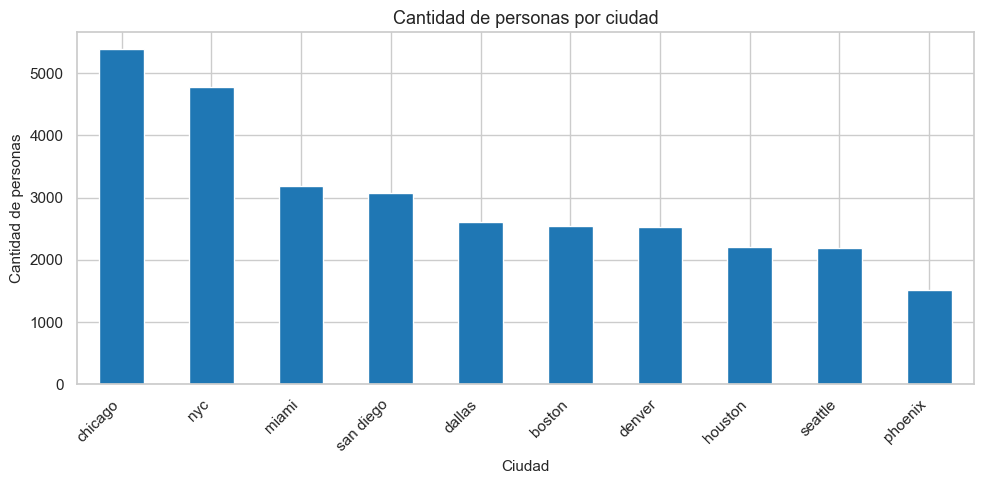

In [15]:
# === Barras: cantidad de personas por ciudad ===
ax = (df["ciudad_residencia"]
        .value_counts()
        .sort_values(ascending=False)
        .plot(kind="bar", color="tab:blue"))

ax.set_title("Cantidad de personas por ciudad")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Cantidad de personas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


2) Listado: distribución por estrato socioeconómico

Qué responde: cómo se reparte la base en los estratos.
Por qué útil: segmentación socioeconómica básica para estrategias y lectura del mercado.

In [16]:
# === Listado: distribución por estrato socioeconómico ===
# Orden razonable si los estratos son {bajo, medio, alto, muy alto}
orden_estrato = ["bajo", "medio", "alto", "muy alto"]
serie = df["estrato_socioeconomico"].value_counts(dropna=False)

# Reordenamos si están todos en el universo esperado
if set(orden_estrato).issubset(set(serie.index)):
    serie = serie.reindex(orden_estrato)

dist_estrato = (serie
                .rename("count")
                .to_frame()
                .assign(porcentaje=lambda x: (x["count"]/len(df)*100).round(2)))

dist_estrato


,count,porcentaje
estrato_socioeconomico,,
Medio,9325,31.08
Alto,9038,30.13
Bajo,6161,20.54
Muy Alto,5476,18.25


3) Gráfico: ciudades con mayor gasto promedio mensual en restaurantes

Qué responde: ranking por gasto mensual medio, no por volumen.
Por qué útil: identifica ciudades “premium” por gasto (potencial comercial).

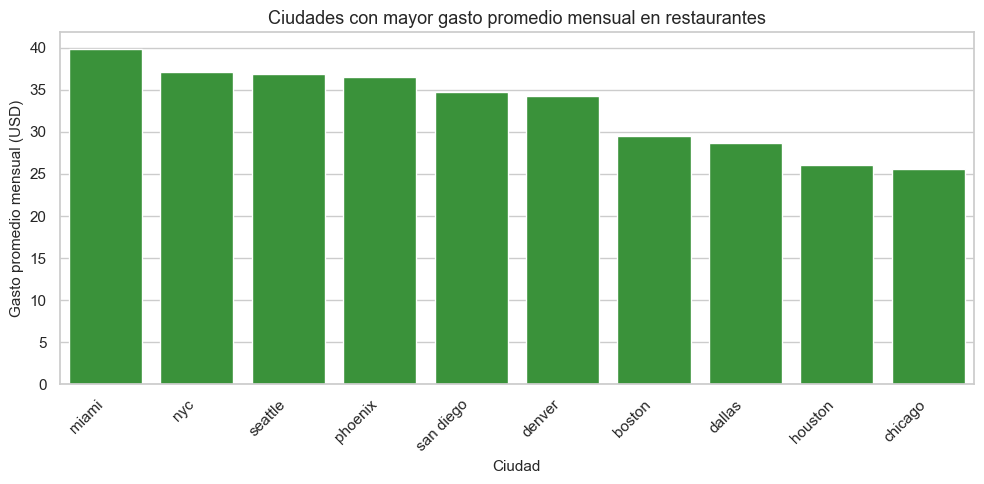

,ciudad_residencia,gasto_prom
5,miami,39.821543
6,nyc,37.123200
9,seattle,36.861784
7,phoenix,36.544770
8,san diego,34.751539
3,denver,34.264096
0,boston,29.494766
2,dallas,28.695238
4,houston,26.020559
1,chicago,25.531782


In [17]:
# === Top ciudades por gasto promedio mensual ===
# Filtramos nulos por seguridad
tmp = (df.dropna(subset=["promedio_gasto_comida", "ciudad_residencia"])
         .groupby("ciudad_residencia", as_index=False)
         .agg(gasto_prom=("promedio_gasto_comida", "mean"))
         .sort_values("gasto_prom", ascending=False))

# Tomamos todas o el top N (si fuera necesario)
ax = sns.barplot(data=tmp, x="ciudad_residencia", y="gasto_prom", color="tab:green")
ax.set_title("Ciudades con mayor gasto promedio mensual en restaurantes")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Gasto promedio mensual (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

tmp.head(10)  # tabla complementaria


4) Gráfico: relación entre frecuencia de visita y gasto promedio por estrato socioeconómico

Qué responde: muestra cómo se relacionan la frecuencia de visitas a restaurantes y el gasto promedio por comida, diferenciando por nivel socioeconómico.
Por qué útil: permite identificar patrones de consumo — por ejemplo, si los estratos altos visitan menos pero gastan más, o si los estratos medios mantienen frecuencia y gasto equilibrados.

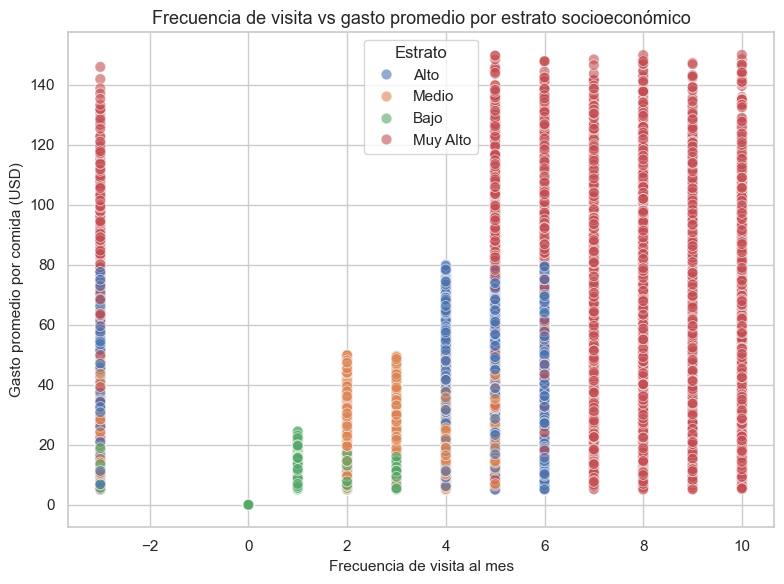

In [18]:
# === Relación entre frecuencia de visita y gasto promedio por estrato ===

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="frecuencia_visita",
    y="promedio_gasto_comida",
    hue="estrato_socioeconomico",
    alpha=0.6,
    s=60
)

plt.title("Frecuencia de visita vs gasto promedio por estrato socioeconómico")
plt.xlabel("Frecuencia de visita al mes")
plt.ylabel("Gasto promedio por comida (USD)")
plt.legend(title="Estrato")
plt.tight_layout()
plt.show()


5) Gráfico: relación entre gasto promedio mensual y nivel de ingresos

Qué responde: evidencia si los ingresos mensuales influyen directamente en el gasto promedio por comida.
Por qué útil: ayuda a comprender si el gasto en restaurantes depende de la capacidad económica o si hay comportamientos atípicos (clientes de ingresos medios con alto gasto).

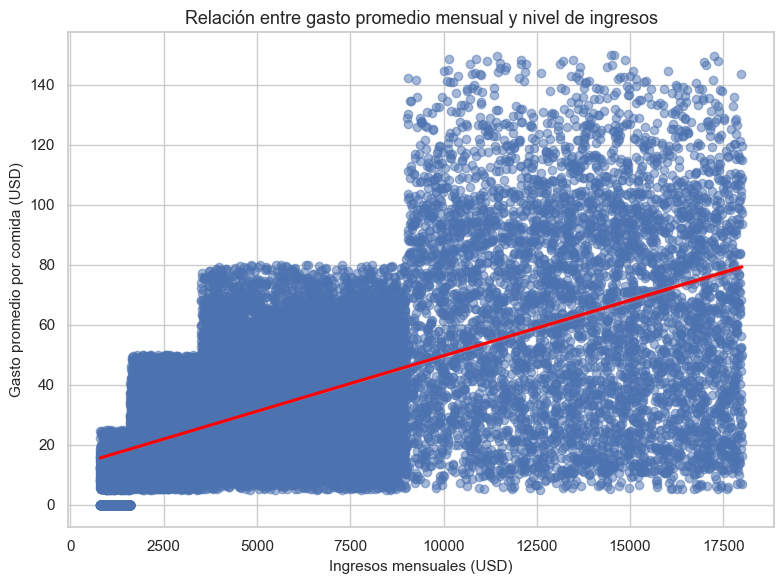

Correlación gasto-ingresos: 0.64


In [19]:
# === Relación entre gasto mensual y nivel de ingresos ===

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="ingresos_mensuales",
    y="promedio_gasto_comida",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.title("Relación entre gasto promedio mensual y nivel de ingresos")
plt.xlabel("Ingresos mensuales (USD)")
plt.ylabel("Gasto promedio por comida (USD)")
plt.tight_layout()
plt.show()

# Correlación numérica
corr = df["promedio_gasto_comida"].corr(df["ingresos_mensuales"])
print(f"Correlación gasto-ingresos: {corr:.2f}")


6) Gráfico: distribución de preferencias alimenticias

Qué responde: identifica los tipos de alimentación más frecuentes entre los clientes, tanto de forma global como segmentada por ciudad.
Por qué útil: permite reconocer oportunidades de mercado según gustos gastronómicos, ayudando a adaptar menús y estrategias locales.

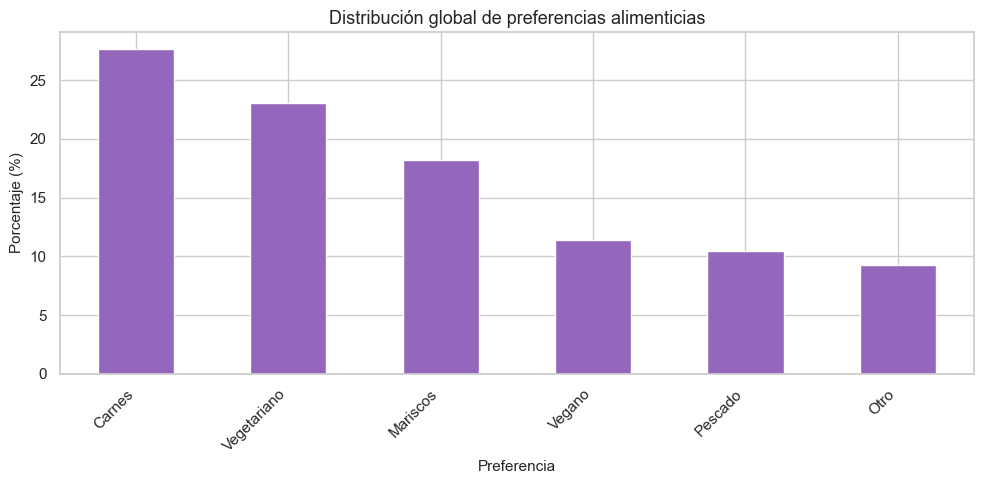

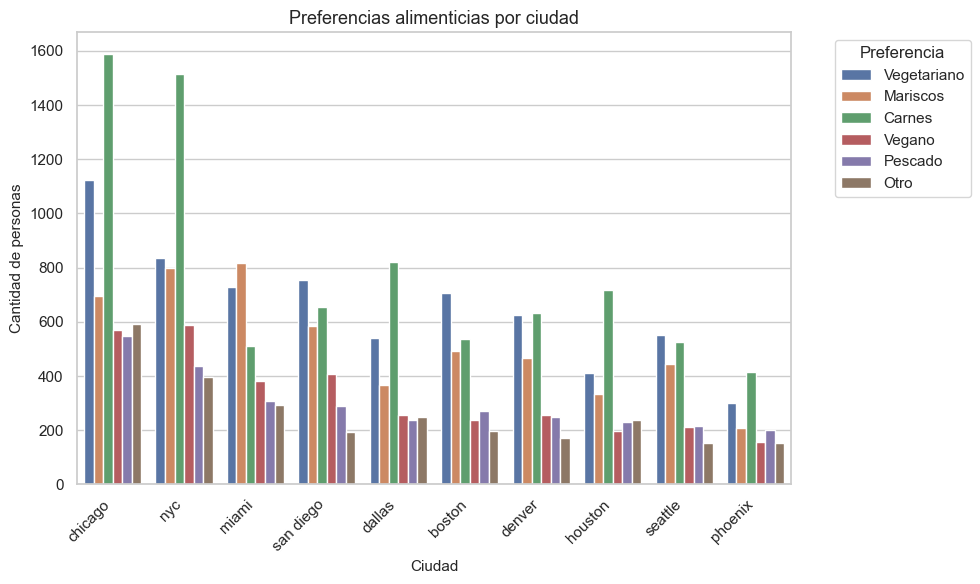

In [20]:
# === Distribución global de preferencias alimenticias ===
pref_global = df["preferencias_alimenticias"].value_counts(normalize=True) * 100
pref_global.plot(kind="bar", color="tab:purple")

plt.title("Distribución global de preferencias alimenticias")
plt.xlabel("Preferencia")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === 6B) Distribución por ciudad ===
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="ciudad_residencia",
    hue="preferencias_alimenticias",
    order=df["ciudad_residencia"].value_counts().index
)
plt.title("Preferencias alimenticias por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de personas")
plt.legend(title="Preferencia", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


7) Análisis: perfil de los clientes de mayor gasto (top 10%)

Qué responde: describe las características de los consumidores que más gastan (percentil 90 en gasto promedio).
Por qué útil: permite definir perfiles de alto valor (VIP), conocer sus preferencias alimenticias y orientar campañas o beneficios personalizados.

Umbral del top 10% de gasto: 68.24 USD



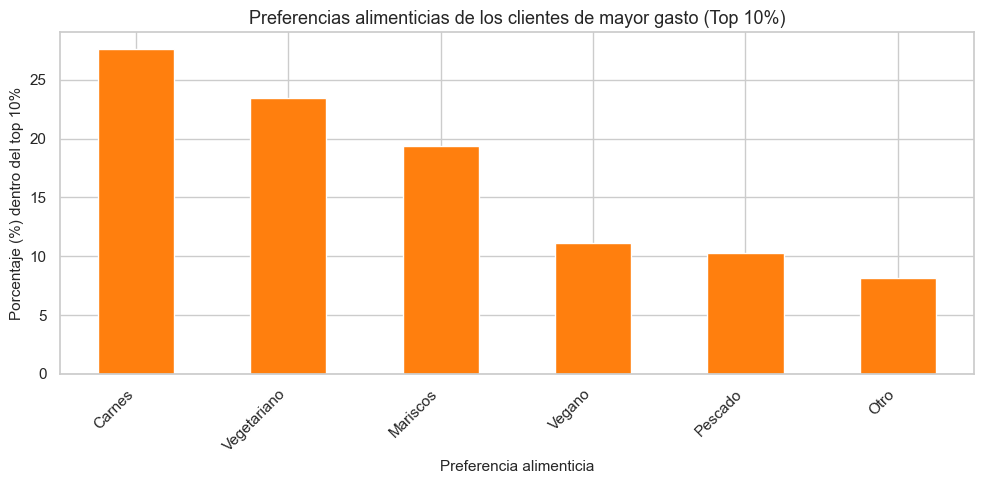

preferencias_alimenticias
Carnes         27.66
Vegetariano    23.45
Mariscos       19.41
Vegano         11.09
Pescado        10.25
Otro            8.14
Name: porcentaje, dtype: float64

In [21]:
# === Perfil de los clientes de mayor gasto ===

umbral_top = df["promedio_gasto_comida"].quantile(0.90)
top_spenders = df[df["promedio_gasto_comida"] >= umbral_top]

print(f"Umbral del top 10% de gasto: {umbral_top:.2f} USD\n")

# Perfil por preferencia alimenticia
perfil_gasto = (
    top_spenders["preferencias_alimenticias"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename("porcentaje")
)

perfil_gasto.plot(kind="bar", color="tab:orange")
plt.title("Preferencias alimenticias de los clientes de mayor gasto (Top 10%)")
plt.xlabel("Preferencia alimenticia")
plt.ylabel("Porcentaje (%) dentro del top 10%")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

perfil_gasto


8) Gráfico: ciudades con mayor proporción de membresías premium

Qué responde: calcula la tasa de usuarios con membresía paga en cada ciudad.
Por qué útil: permite detectar los mercados con mayor disposición a pagar por beneficios exclusivos, claves para estrategias de fidelización o expansión.

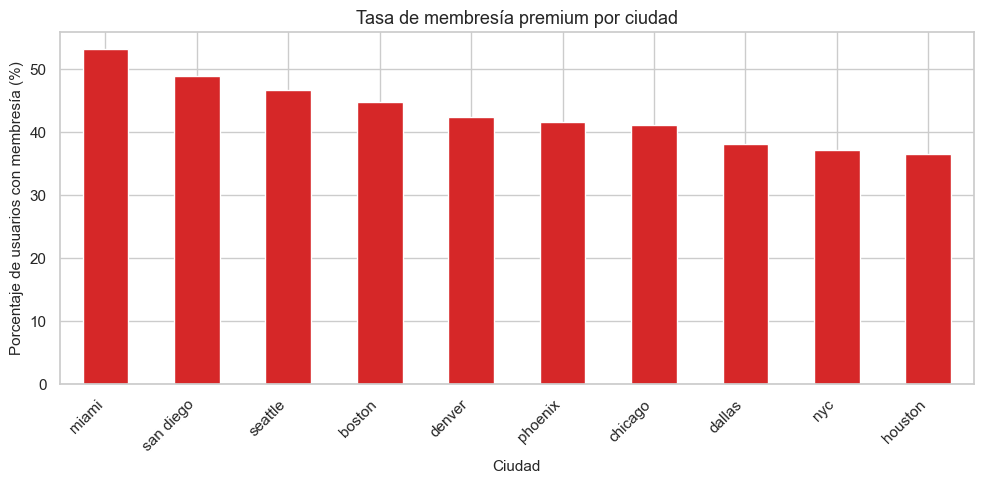

ciudad_residencia
miami        53.170119
san diego    48.845528
seattle      46.691009
boston       44.719278
denver       42.330559
phoenix      41.628061
chicago      41.140416
dallas       38.124520
nyc          37.219543
houston      36.528029
Name: tasa_premium_%, dtype: float64

In [22]:
# === Ciudades con mayor proporción de membresías premium ===

tasa_membresia = (
    df.groupby("ciudad_residencia")["membresia_premium"]
    .apply(lambda x: (x == "sí").mean() * 100)
    .sort_values(ascending=False)
    .rename("tasa_premium_%")
)

tasa_membresia.plot(kind="bar", color="tab:red")
plt.title("Tasa de membresía premium por ciudad")
plt.ylabel("Porcentaje de usuarios con membresía (%)")
plt.xlabel("Ciudad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

tasa_membresia.head(10)


9) Gráfico: consumo de alcohol vs edad

Qué responde: compara la distribución de edades entre quienes consumen alcohol y quienes no.
Por qué útil: ayuda a segmentar campañas por grupos etarios y ajustar ofertas de bebidas según el público objetivo.

C:\Users\Diego Garcia\AppData\Local\Temp\ipykernel_1244\1165444654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


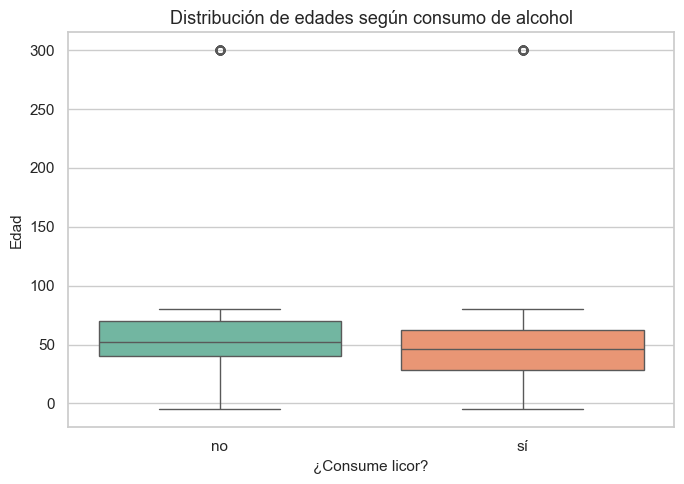

Edad promedio por grupo:
 consume_licor
no    54.7
sí    46.6
Name: edad, dtype: float64


In [23]:
# === Consumo de alcohol vs edad ===

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df,
    x="consume_licor",
    y="edad",
    palette="Set2"
)

plt.title("Distribución de edades según consumo de alcohol")
plt.xlabel("¿Consume licor?")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()

# Promedio de edad por grupo
edad_prom = df.groupby("consume_licor")["edad"].mean().round(1)
print("Edad promedio por grupo:\n", edad_prom)


## Análisis de Resultados

### **1️. Distribución de clientes por ciudad**
Chicago y Nueva York concentran el mayor número de clientes, seguidas por Miami y San Diego.  
Esto sugiere que las principales áreas metropolitanas representan el núcleo de la base de datos, lo cual es coherente con una mayor densidad poblacional y oferta gastronómica.  
Phoenix, en cambio, tiene menor presencia, posiblemente por tamaño de mercado o menor penetración de la base de datos.

---

### **2️. Distribución por estrato socioeconómico**
El 61% de los clientes pertenece a los estratos **medio y alto**, lo que refleja un público con capacidad adquisitiva moderada a elevada.  
Los estratos **muy altos (18%)** completan un segmento más reducido pero estratégico para servicios premium.  
Esto indica que la mayoría del público objetivo se ubica en una zona de consumo intermedio.

---

### **3️. Ciudades con mayor gasto promedio mensual en restaurantes**
Miami lidera el ranking con **≈40 USD** de gasto promedio, seguida por NYC, Seattle y Phoenix.  
Estas ciudades pueden considerarse mercados “premium”, donde los clientes gastan más aunque no sean necesariamente los más numerosos.  
Este patrón muestra el potencial de concentrar estrategias de marketing o alianzas comerciales en esas zonas.

---

### **4️. Relación entre frecuencia de visita y gasto promedio (por estrato)**
El gráfico evidencia que los clientes de **estratos muy altos** presentan altos niveles de gasto, independientemente de la frecuencia de visita, mientras que los **estratos bajos y medios** muestran menor gasto aunque visiten con regularidad.  
Esto sugiere que el nivel socioeconómico influye más en el monto gastado que la frecuencia misma.

---

### **5️. Relación entre gasto promedio mensual e ingresos mensuales**
La correlación de **0.64** indica una relación **moderadamente fuerte y positiva**: a mayores ingresos, mayor gasto promedio en restaurantes.  
Sin embargo, se observan dispersiones que revelan grupos con gasto alto pese a ingresos medios, un comportamiento típico de consumidores con alta preferencia por experiencias gastronómicas.

---

### **6️. Distribución de preferencias alimenticias (global y por ciudad)**
A nivel global, predominan las categorías **“Carnes” (27%)**, seguidas por **“Vegetariano” (23%)** y **“Mariscos” (18%)**.  
En las ciudades grandes (Chicago, NYC, Miami) la tendencia se repite, aunque se observa mayor diversidad alimenticia.  
Esto evidencia una mezcla de hábitos tradicionales y saludables, con oportunidades para adaptar menús y campañas según región.

---

### **7️. Perfil de los clientes de mayor gasto (Top 10%)**
Los clientes en el percentil 90 del gasto se inclinan también por **“Carnes” y “Vegetariano”**, lo que sugiere que incluso entre los de alto poder adquisitivo existe interés por opciones saludables, sin abandonar las preferencias clásicas.  
Constituyen un segmento clave para **programas premium o experiencias personalizadas**.

---

### **8️. Ciudades con mayor proporción de membresías premium**
**Miami (≈53%)** encabeza la tasa de membresías pagas, seguida por San Diego y Seattle.  
La tendencia coincide con las ciudades de mayor gasto, reforzando la idea de que los mercados de alto consumo presentan mayor disposición a pagar por beneficios exclusivos.

---

### **9️. Relación entre consumo de alcohol y edad**
El consumo de alcohol se asocia con clientes **ligeramente más jóvenes (46.6 años)** frente a los que no consumen (**54.7 años**).  
El boxplot muestra una dispersión amplia, aunque la mediana se ubica consistentemente por debajo de los 50 años para quienes consumen.  
Esto respalda estrategias segmentadas por edad y preferencia en bebidas.

---

## Conclusiones Generales

- **Miami se consolida como el mercado más atractivo**, destacando simultáneamente por alto gasto promedio y elevada tasa de membresías premium.  
- Los **estratos altos y muy altos** concentran los mayores niveles de gasto, pero la frecuencia no es necesariamente mayor, lo que sugiere valor en la exclusividad más que en la recurrencia.  
- Existe **correlación positiva entre ingresos y gasto**, aunque con una franja media que gasta por encima de lo esperado.  
- Las **preferencias alimenticias** combinan tradición y salud: predominan las carnes, pero los vegetarianos y veganos representan un nicho creciente.  
- El **perfil del cliente premium** tiende a ser adulto, con poder adquisitivo medio-alto, hábitos regulares de consumo y afinidad por opciones de calidad.  
- Las estrategias futuras deberían enfocarse en **segmentación geográfica y de estilo de vida**, optimizando promociones por tipo de cliente y ciudad.  

---

**Próximos pasos sugeridos**
De acuerdo a lo evidenciado en la base de datos, se puede sugerir como análisis posterior:
- Incorporar análisis temporal (tendencias por mes o temporada).  
- Integrar nuevos datos externos (eventos, clima o turismo).  
- Desarrollar un modelo predictivo de gasto o propensión a membresía premium.

- **Notebook de entrega:** `Avance_3_Analisis_Interpretacion.ipynb`
---